<h2> Image Detection Using CNN</h2>
<p> We are using the cifer10 data from tensorflow to train our model </p>

In [1]:
# importing the libraries
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading the dataset
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 42s 0us/step


(50000, 32, 32, 3)

In [3]:
# reshaping the y_train as we only need one dimensional data
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
# classes to be predicted
clases = ['airplane' ,
          'automobile' ,
          'bird' ,
          'cat' ,
          'deer' ,
          'dog' ,
          'frog' ,
          'horse' ,
          'ship' ,
          'truck']

In [6]:
# making a function to display images
def plots(X,y , index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(clases[y[index]])

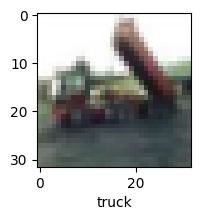

In [7]:
plots(X_train , y_train , 2)

In [8]:
# normalizing the data trasforming b/w 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# building our traditional neural network to check the accuracy
ann = models.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(3000 , activation = 'relu'),
    tf.keras.layers.Dense(1000 , activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
ann.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.8146 - accuracy: 0.3518
Epoch 2/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.6240 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.5401 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4815 - accuracy: 0.4792
Epoch 5/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.4323 - accuracy: 0.4961


In [10]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

# predicting the output from our ann model

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n' ,
      classification_report(y_test , y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.58      0.55      1000
           1       0.60      0.60      0.60      1000
           2       0.39      0.34      0.36      1000
           3       0.37      0.35      0.36      1000
           4       0.37      0.51      0.43      1000
           5       0.64      0.14      0.24      1000
           6       0.53      0.53      0.53      1000
           7       0.53      0.59      0.56      1000
           8       0.60      0.65      0.63      1000
           9       0.50      0.61      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [11]:
# creating the CNN neural network 
cnn = models.Sequential([
    layers.Conv2D(filters = 32 ,
                  kernel_size = (3,3) ,
                  activation = 'relu' ,
                  input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64 ,
                  kernel_size = (3,3) ,
                  activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(10 , activation = 'softmax')
])

In [12]:
# compiling the model
cnn.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
cnn.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.4891 - accuracy: 0.4635
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1373 - accuracy: 0.6020
Epoch 3/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9966 - accuracy: 0.6536
Epoch 4/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9072 - accuracy: 0.6840
Epoch 5/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8359 - accuracy: 0.7106
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7777 - accuracy: 0.7289
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7311 - accuracy: 0.7465
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6894 - accuracy: 0.7610
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6519 - accuracy: 0.7725
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [14]:
# evaluation of model
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8918 - accuracy: 0.7064


[0.8918243050575256, 0.7063999772071838]

In [15]:
# reshaping the data
y_test = y_test.reshape(-1,)

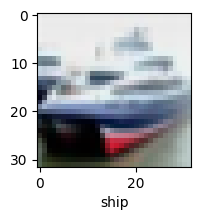

In [16]:
#ploting the acutual value
plots(X_test , y_test , 1)

In [17]:
# prediction from the CNN model
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [18]:
# getting the output by getting the max values
y_class = [np.argmax(element) for element in y_pred]

In [19]:
y_class[:5]

[3, 8, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [21]:
# predicted and actual output 
clases[y_class[1]]

'ship'

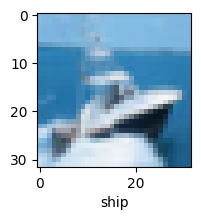

In [22]:
plots(X_train , y_train , 8)